In [26]:
#E-Commerce Sales Performance & Customer Behavior Analysis

In [27]:
#importing pandas and loading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel("data/Online Retail.xlsx")



In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##Understanding the data


In [29]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [30]:
df.describe()

#using describe we can see that we have negative quantities 

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [31]:
df.shape

(541909, 8)

## identifying problems in dataset

In [32]:
df.isnull().sum()
# after running the script we see that we have a so many customerID field as null

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

after checking the null it is found that there is more than 100k customerID null and 1454 description null, so 
it is better to clean data and later create to datasets for a better result in future calculations both cusotmer and sales perspective

In [33]:
df_clean = df.copy()

In [34]:
df_clean.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [35]:
#we drop 1454 descriptions null values becaues the data is not that big

df_clean = df_clean.dropna(subset=['Description'])

In [36]:
df_clean.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

### checking if we have cancelled transactions in our dataset

In [37]:
df_clean['InvoiceNo'].astype(str).str.startswith('C').sum()

np.int64(9288)

In [38]:
#since we have cacnelled translation we will now remove them from the dataset
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

In [39]:
#rerrun to check if cancelled data is removed
df_clean['InvoiceNo'].astype(str).str.startswith('C').sum()

np.int64(0)

### checking if there is any quantity less than zero

In [42]:
(df_clean['Quantity'] < 0).sum()

np.int64(474)

In [43]:
df_zero_quantity = df_clean[df_clean['Quantity'] <0]
df_zero_quantity.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom
538919,581422,23169,smashed,-235,2011-12-08 15:24:00,0.0,NaN,United Kingdom


In [47]:
#remvoing the negative quantities
df_clean = df_clean[df_clean['Quantity'] > 0]
df_clean.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### checking if there is negative prices 

In [51]:
(df_clean['UnitPrice']<0).sum()

np.int64(2)

In [ ]:
#removing prices less than zero
df_clean = df_clean[df_clean['UnitPrice']>0]


np.int64(0)

### checking data types if they are valid data type or need to be changed

In [56]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


### creating time features

In [57]:
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['MonthName'] = df_clean['InvoiceDate'].dt.month_name()

In [58]:
df_clean.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December


### creating total sales column

In [59]:
df_clean['TotalSale'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [60]:
df_clean.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthName,TotalSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,20.34


### checking for duplicates and removing the duplicates

In [62]:
print(df_clean.duplicated().sum())

5226


In [63]:
df_clean = df_clean.drop_duplicates()

In [64]:
print(df_clean.duplicated().sum())

0


### since done with cleaning we create two subset dataset using our cleaned datsets

In [65]:
df_sales = df_clean.copy()

In [66]:
df_customers = df_clean.dropna(subset=['CustomerID'])

In [67]:
df_sales.shape

(524878, 12)

In [68]:
df_customers.shape

(392692, 12)

In [69]:
df_sales.info()
df_sales.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      524878 non-null  object        
 8   Year         524878 non-null  int32         
 9   Month        524878 non-null  int32         
 10  MonthName    524878 non-null  object        
 11  TotalSale    524878 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(5)
memory usage: 48.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,TotalSale
count,524878.000000,524878,524878.000000,392692.000000,524878.000000,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,15287.843865,2010.921904,7.552237,20.275399
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,2010.000000,1.000000,0.001000
25%,1.000000,2011-03-28 12:13:00,1.250000,13955.000000,2011.000000,5.000000,3.900000
50%,4.000000,2011-07-20 11:22:00,2.080000,15150.000000,2011.000000,8.000000,9.920000
75%,11.000000,2011-10-19 11:41:00,4.130000,16791.000000,2011.000000,11.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,2011.000000,12.000000,168469.600000
std,156.280031,NaN,36.093028,1713.539549,0.268323,3.508164,271.693566


### data cleaning summary 
The dataset was cleaned by removing cancelled transactions, correcting invalid quantities and prices, handling missing values appropriately, and engineering time and revenue features for downstream analysis

In [70]:
df_sales.to_csv("data/ecommerce_sales_cleaned.csv", index=False)
df_customers.to_csv("data/ecommerce_customers_cleaned.csv", index=False)


## Basic Exploratory Data Analysis 

In [72]:
df_sales.shape



(524878, 12)

In [73]:
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthName,TotalSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,20.34


In [74]:
df_sales.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,TotalSale
count,524878.000000,524878,524878.000000,392692.000000,524878.000000,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,15287.843865,2010.921904,7.552237,20.275399
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,2010.000000,1.000000,0.001000
25%,1.000000,2011-03-28 12:13:00,1.250000,13955.000000,2011.000000,5.000000,3.900000
50%,4.000000,2011-07-20 11:22:00,2.080000,15150.000000,2011.000000,8.000000,9.920000
75%,11.000000,2011-10-19 11:41:00,4.130000,16791.000000,2011.000000,11.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,2011.000000,12.000000,168469.600000
std,156.280031,NaN,36.093028,1713.539549,0.268323,3.508164,271.693566


### Revenue overview

In [77]:
#total revenue
print("Total sales is ", df_sales['TotalSale'].sum())

Total sales is  10642110.804


Revenue Distribution

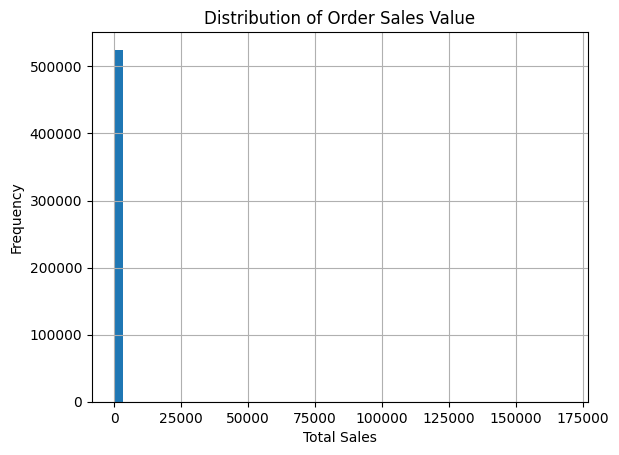

In [79]:
df_sales['TotalSale'].hist(bins=50)
plt.title("Distribution of Order Sales Value")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()


### Top Countries by revenue

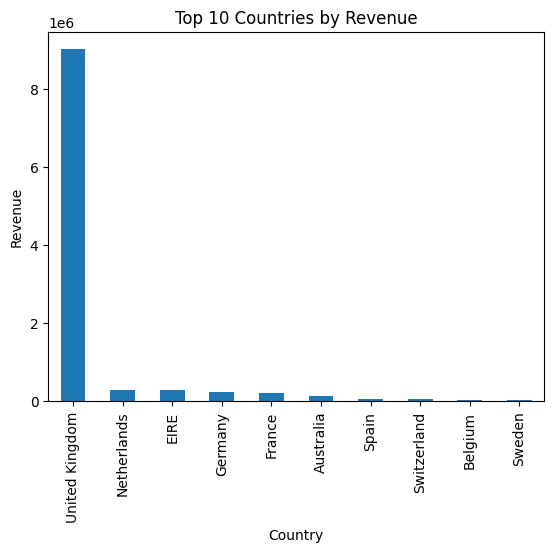

In [80]:
country_revenue = (
    df_sales.groupby('Country')['TotalSale'].sum()
    .sort_values(ascending=False)
    .head(10)

)

country_revenue.plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.show()

### Montly Revenue

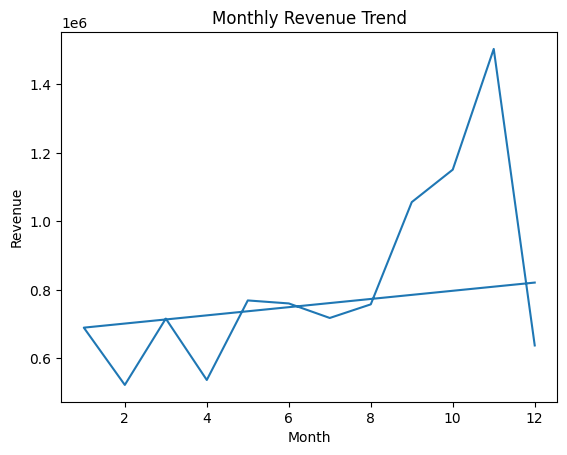

In [84]:
monthly_revenue = (
    df_sales.groupby(['Year','Month'])['TotalSale']
    .sum()
    .reset_index()
)

plt.plot(monthly_revenue['Month'], monthly_revenue['TotalSale'])
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


### Top Product by Revenue

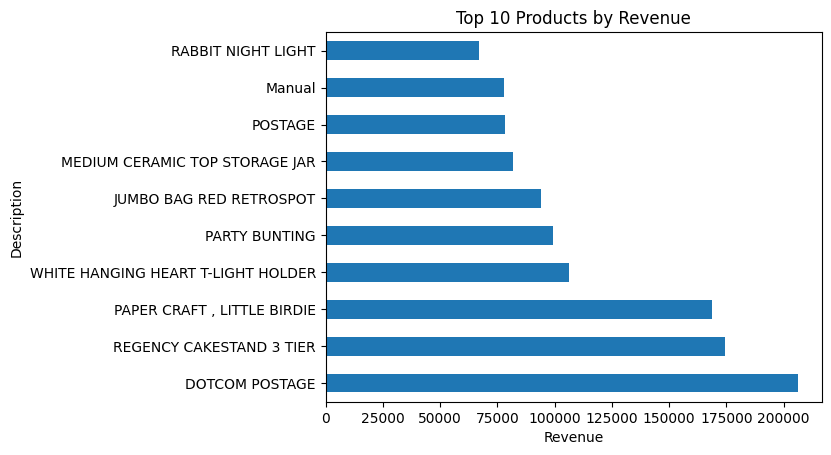

In [87]:
top_products = (
    df_sales.groupby('Description')['TotalSale']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind='barh')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.show()

### Cusotmer Behavior

In [89]:
customer_revenue = (
    df_customers.groupby('CustomerID')['TotalSale']
    .sum()
)

customer_revenue.describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: TotalSale, dtype: float64

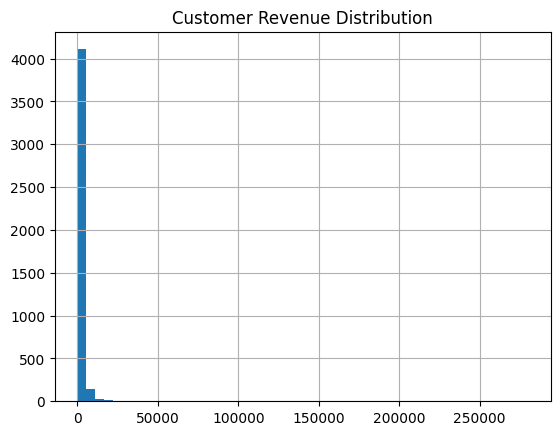

In [90]:
customer_revenue.hist(bins=50)
plt.title("Customer Revenue Distribution")
plt.show()

### Order Frequency by each customers

In [91]:
order_per_customer = (
    df_customers.groupby('CustomerID')['InvoiceNo']
    .nunique()


)

order_per_customer.describe()

count    4338.000000
mean        4.272015
std         7.697998
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: InvoiceNo, dtype: float64

## Analysis ready metrics

In [93]:
order_value = (
    df_sales
    .groupby('InvoiceNo')['TotalSale']
    .sum()
    .reset_index(name='OrderValue')
)

order_value


,InvoiceNo,OrderValue
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85
...,...,...
19955,581584,140.64
19956,581585,329.05
19957,581586,339.20
19958,581587,249.45


In [100]:
#average order value
# AOV = df_sales['OrderValue'].mean()
# AOV


### order frequency per customer

In [102]:
customer_orders = (
    df_customers
    .groupby('CustomerID')['InvoiceNo']
    .nunique()
    .reset_index(name='OrderCount')
)

customer_orders

,CustomerID,OrderCount
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16


### Latest purchases


In [106]:
last_purchase = (
    df_customers
    .groupby('CustomerID')['InvoiceDate']
    .max()
    .reset_index(name='LastPurchaseDate')
)
last_purchase


,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4333,18280.0,2011-03-07 09:52:00
4334,18281.0,2011-06-12 10:53:00
4335,18282.0,2011-12-02 11:43:00
4336,18283.0,2011-12-06 12:02:00


In [107]:
# checking time based features
df_sales[['Year', 'Month', 'MonthName']].head()


,Year,Month,MonthName
0,2010,12,December
1,2010,12,December
2,2010,12,December
3,2010,12,December
4,2010,12,December
